<a href="https://colab.research.google.com/github/Sahilvohra58/CNNComputerVision/blob/main/Resnet_VS_Efficientnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
with zipfile.ZipFile("10_food_classes_10_percent.zip","r") as zip_ref:
    zip_ref.extractall()

--2021-11-24 15:22:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.202.128, 74.125.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  60.8MB/s    in 2.6s    

2021-11-24 15:22:35 (60.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/gr

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Image_shape = (224,224)
Batch_size = 32

train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

train_datagen = ImageDataGenerator(rescale = 1/255.) #Since the training data has 75 images per class there is no need to do data augmentation.
test_datagen = ImageDataGenerator(rescale = 1/255.)

print('Training images:')
train_data = train_datagen.flow_from_directory(train_dir, target_size = Image_shape, batch_size = Batch_size, class_mode = 'categorical')

print('Test images:')
test_data = test_datagen.flow_from_directory(test_dir, target_size = Image_shape, batch_size = Batch_size, class_mode = 'categorical')

Training images:
Found 750 images belonging to 10 classes.
Test images:
Found 2500 images belonging to 10 classes.


#Experiment tracking with TensorBoard

In [4]:
import datetime
def create_tensorboard_callback(dirname, experiment_name):
  log_dir = dirname + '/' + experiment_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
  print(f'saving TensorBoard log files to: {log_dir}')
  return tensorboard_callback

In [5]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'

efficient_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'

In [6]:
import tensorflow as tf
import tensorflow_hub as hub

def create_model(model_url, num_classes = 10):

  feature_extraction_layer = hub.KerasLayer(model_url, trainable = False, name = 'feature_extraction_layer', input_shape = Image_shape+(3,))
  model = tf.keras.models.Sequential([
          feature_extraction_layer,
          tf.keras.layers.Dense(10, activation = 'softmax')                         
                         ])
  return model

In [9]:
resnet_model = create_model(model_url= resnet_url, num_classes=train_data.num_classes)
resnet_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
resnet_history = resnet_model.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data), callbacks = [create_tensorboard_callback(dirname="tensorflow_hub", experiment_name='Resnet50v2')])

saving TensorBoard log files to: tensorflow_hub/Resnet50v2/20211124-152558
Epoch 1/5
24/24 [==============================] - 27s 940ms/step - loss: 1.7939 - accuracy: 0.3893 - val_loss: 1.1205 - val_accuracy: 0.6496
Epoch 2/5
24/24 [==============================] - 21s 905ms/step - loss: 0.8397 - accuracy: 0.7480 - val_loss: 0.8123 - val_accuracy: 0.7412
Epoch 3/5
24/24 [==============================] - 21s 901ms/step - loss: 0.5905 - accuracy: 0.8320 - val_loss: 0.7315 - val_accuracy: 0.7692
Epoch 4/5
24/24 [==============================] - 21s 895ms/step - loss: 0.4646 - accuracy: 0.8787 - val_loss: 0.7008 - val_accuracy: 0.7716
Epoch 5/5
24/24 [==============================] - 21s 892ms/step - loss: 0.3636 - accuracy: 0.9227 - val_loss: 0.6552 - val_accuracy: 0.7868


In [10]:
efficientnet_model = create_model(model_url= efficient_url, num_classes=train_data.num_classes)
efficientnet_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
efficientnet_history = efficientnet_model.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data), callbacks = [create_tensorboard_callback(dirname="tensorflow_hub", experiment_name='Efficientnetb0')])

saving TensorBoard log files to: tensorflow_hub/Resnet50v2/20211124-152804
Epoch 1/5
24/24 [==============================] - 32s 889ms/step - loss: 1.8365 - accuracy: 0.4520 - val_loss: 1.2926 - val_accuracy: 0.7312
Epoch 2/5
24/24 [==============================] - 19s 803ms/step - loss: 1.0756 - accuracy: 0.7533 - val_loss: 0.8654 - val_accuracy: 0.8240
Epoch 3/5
24/24 [==============================] - 19s 797ms/step - loss: 0.7666 - accuracy: 0.8267 - val_loss: 0.6945 - val_accuracy: 0.8464
Epoch 4/5
24/24 [==============================] - 19s 802ms/step - loss: 0.6188 - accuracy: 0.8600 - val_loss: 0.6120 - val_accuracy: 0.8548
Epoch 5/5
24/24 [==============================] - 19s 812ms/step - loss: 0.5215 - accuracy: 0.8787 - val_loss: 0.5571 - val_accuracy: 0.8628


In [13]:
import matplotlib.pyplot as plt

def plot_history(history_data, title_name):
  plt.figure()
  plt.plot(history_data.history['loss'], label = 'loss')
  plt.plot(history_data.history['val_loss'], label = 'val_loss')
  plt.legend(['loss', 'val_loss'])
  plt.title(title_name)
  plt.show()

  plt.figure()
  plt.plot(history_data.history['accuracy'], label = 'accuracy')
  plt.plot(history_data.history['val_accuracy'], label = 'val_accuracy')
  plt.legend()
  plt.title(title_name)
  plt.show()
  return

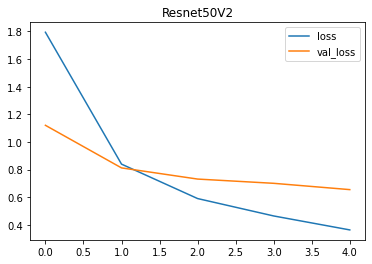

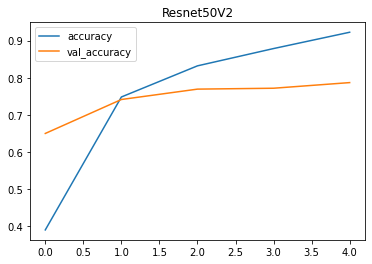

In [15]:
plot_history(resnet_history, 'Resnet50V2')


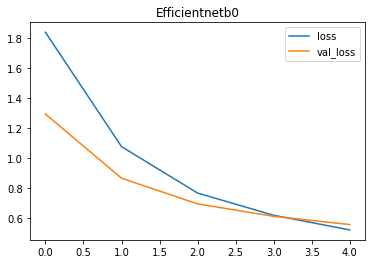

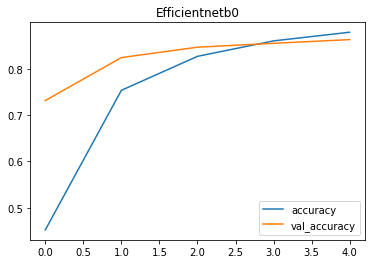

In [16]:
plot_history(efficientnet_history, 'Efficientnetb0')


In [28]:
#Upload TensorBoard dev records
logdir = '/content/tensorflow_hub'
!tensorboard dev upload --logdir ./tensorflow_hub \
    --name "EfficientNetB0 vs. ResNet50V2" \
    --description "Simple comparison of several hyperparameters" \
    --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/OFVlNjq0RdKuEL26ZCqJlQ/

[2021-11-24T15:39:42] Started scanning logdir.
[2021-11-24T15:39:45] Total uploaded: 90 scalars, 0 tensors, 3 binary objects (7.4 MB)
[2021-11-24T15:39:45] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/OFVlNjq0RdKuEL26ZCqJlQ/


In [29]:
!tensorboard dev list

https://tensorboard.dev/experiment/OFVlNjq0RdKuEL26ZCqJlQ/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Simple comparison of several hyperparameters
	Id                   OFVlNjq0RdKuEL26ZCqJlQ
	Created              2021-11-24 15:39:42 (2 minutes ago)
	Updated              2021-11-24 15:39:45 (2 minutes ago)
	Runs                 6
	Tags                 5
	Scalars              90
	Tensor bytes         0
	Binary object bytes  7764614
Total: 1 experiment(s)


In [ ]:
!tensorboard dev delete --experiment_id [Insert_Experiment_ID]
!tensorboard dev list